In [ ]:
from datetime import *
import pandas as pd
import numpy as np
import random
import time
import csv
import os

def get_ASS_time():
    ASS_prob = [0.03,0.06,0.12,0.15,0.27,0.06,0.21,0.09]
    # 產生有機率(cdf)性質的隨機變數
    U = random.uniform(0,sum(ASS_prob))
    n = 0
    value = 0
    while True:
        value += ASS_prob[n]
        n += 1
        if value > U:
            n -= 1
            break
    ASS_prob_time = ["13:11","14:15","15:35","16:21","17:41","17:43","17:50","18:06"]
    return ASS_prob_time[n]

def get_ASS_date():
    # 設定起始日期和結束日期
    start_date = datetime(2021, 1, 1)
    end_date = datetime(2022, 12, 31)

    # 產生一個隨機的時間差值
    time_delta = end_date - start_date

    # 隨機生成日期
    random_date = random_date = (start_date + timedelta(days=random.randint(0, time_delta.days))).date()
    return random_date

out_df = {
    'ASS_date':[str(get_ASS_date()) for i in range(35)],
    'ASS_time':[str(get_ASS_time()) for i in range(35)]
}
sorted_df = pd.DataFrame(out_df).sort_values('ASS_date')
sorted_df.to_csv('ASS_time_random.csv', index=False)
sorted_df

In [1]:
from datetime import *
import pandas as pd
import numpy as np
import random
import time
import csv
import os
os.chdir(r'D:\EPSLab_pc\Thomas_碩論\廠商提供')
tou_data = pd.read_csv('tou_data.csv')
nonsummer_tou = np.array(tou_data.iloc[0, 1:])
summer_tou = np.array(tou_data.iloc[1, 1:])
TOU_scenario = np.array([np.repeat(nonsummer_tou, 4)/4,np.repeat(summer_tou, 4)/4])
tou_data

,type,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,非夏月,1.66,1.66,1.66,1.66,1.66,1.66,3.82,3.82,3.82,...,3.82,3.82,3.82,3.82,3.82,3.82,3.82,3.82,3.82,3.82
1,夏月,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,...,4.08,4.08,6.58,6.58,6.58,6.58,6.58,6.58,4.08,4.08


In [ ]:
from datetime import *
import pandas as pd
import numpy as np
import random
import time
import csv
import os

os.chdir(r'C:\Users\li303\OneDrive - 國立成功大學 National Cheng Kung University\桌面\高港\廠商提供')

load_2021 = pd.read_excel('7櫃LOAD.xlsx', sheet_name='2021')
load_2022 = pd.read_excel('7櫃LOAD.xlsx', sheet_name='2022')
pv_2021 = pd.read_excel('7櫃LOAD.xlsx', sheet_name='pv2021')
pv_2022 = pd.read_excel('7櫃LOAD.xlsx', sheet_name='pv2022')

In [ ]:
load_2year = pd.concat([load_2021,load_2022], ignore_index=True)
load_2year.to_csv('7櫃LOAD_2021-22.csv', encoding='utf-8_sig', index=False)

In [ ]:
pv_2021 = pd.concat([pv_2022['time'], pv_2021], axis=1)
pv_2021['time'] = pd.to_datetime(pv_2021['time'])
pv_2021.set_index(pv_2021['time'], drop=True, inplace=True)
pv_2021 = pv_2021.resample('15T').mean()

pv_2022['time'] = pd.to_datetime(pv_2022['time'])
pv_2022.set_index(pv_2022['time'], drop=True, inplace=True)
pv_2022 = pv_2022.resample('15T').mean()

pv_2year = pd.concat([pv_2021, pv_2022])

In [ ]:
pv_2year_reshape = pd.DataFrame(np.reshape(list(pv_2year['pv']),(int(pv_2year.shape[0]/96),96)))
pv_2year_reshape.set_index(load_2year['date'], drop=True, inplace=True)
pv_2year_reshape.to_csv('7櫃PV_2021-22.csv', encoding='utf-8_sig', index=True)

In [ ]:
load = pd.read_csv('7櫃LOAD_2021-22.csv')
load

In [ ]:
date_list = pd.read_csv('7櫃LOAD_2021-22.csv', usecols=['date'])
date_list

In [1]:
from datetime import *
import pandas as pd
import numpy as np
import random
import time
import csv
import os
os.chdir(r'C:\Users\li303\OneDrive - 國立成功大學 National Cheng Kung University\桌面\高港\即時排程_RL')

ASS_time_list = pd.read_csv('ASS_time_random.csv')
ASS_time_list.set_index(pd.to_datetime(ASS_time_list['ASS_date']), inplace=True, drop=True)
ASS_time_list

,ASS_date,ASS_time
ASS_date,,
2021-01-27,2021-01-27,17:41
2021-03-08,2021-03-08,17:41
2021-03-18,2021-03-18,18:06
2021-04-04,2021-04-04,15:35
2021-04-08,2021-04-08,17:50
2021-04-18,2021-04-18,17:50
2021-05-01,2021-05-01,16:21
2021-05-03,2021-05-03,15:35
2021-05-29,2021-05-29,17:41


In [ ]:
day = '2022-01-02'
if(day in ASS_time_list['ASS_date']):
    ASS_time = ASS_time_list.loc[day, 'ASS_time']
    print(ASS_time)
else:
    print(0)


In [4]:
os.chdir(r'C:\Users\li303\OneDrive - 國立成功大學 National Cheng Kung University\桌面\高港\廠商提供')
date_list = pd.read_csv('7櫃LOAD_2021-22.csv', usecols=['date'])
date_list.shape[0]

730

In [12]:
from interval import Interval

def season_judgement(time_now):
    time_now = pd.to_datetime(time_now)
    SUM_time_interval = Interval(date(time_now.year,5,16),date(time_now.year,10,15))
    if (time_now in SUM_time_interval):
        season = 'summer'
    else:
        season = 'normal'
    return season

os.chdir(r'C:\Users\li303\OneDrive - 國立成功大學 National Cheng Kung University\桌面\高港\廠商提供')
date_list = pd.read_csv('7櫃LOAD_2021-22.csv', usecols=['date'])

day = date_list.loc[0, 'date']
# for days in range(len(date_list['date'])):
#     day = date_list.loc[days, 'date']
#     print(day)
season = season_judgement('2022-07-29')
print(season)

summer


c:\Users\li303\anaconda3\lib\site-packages\interval.py:731: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if obj.lower_bound < self.lower_bound:
c:\Users\li303\anaconda3\lib\site-packages\interval.py:733: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  elif obj.lower_bound == self.lower_bound:
c:\Users\li303\anaconda3\lib\site-packages\interval.py:738: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


In [12]:
from datetime import *
import pandas as pd
import numpy as np


time_scale = 4
def Cont_base(day):     #seg = 二/三段式時間電價?
        summer = (6 <= day.month <= 9)
        weekday = day.weekday()
        cont = np.zeros(24)

        if summer:
            cont[:] = 43.4
            if 0 <= weekday <= 4:
                cont[9:16] = 160.6
                cont[16:22] = 217.3
                cont[22:   ] = 160.6
            if weekday == 5:
                cont[9:   ] = 43.4
        else:
            cont[:] = 32.1
            if 0 <= weekday <= 4:
                cont[ 6:11] = 160.6
                cont[14:   ] = 160.6
            if weekday == 5:
                cont[ 6:11] = 32.1
                cont[14:   ] = 32.1
        return cont
print(Cont_base(pd.to_datetime('2023-05-03')))
print(Cont_base(pd.to_datetime('2023-08-03')))

[ 32.1  32.1  32.1  32.1  32.1  32.1 160.6 160.6 160.6 160.6 160.6  32.1
  32.1  32.1 160.6 160.6 160.6 160.6 160.6 160.6 160.6 160.6 160.6 160.6]
[ 43.4  43.4  43.4  43.4  43.4  43.4  43.4  43.4  43.4 160.6 160.6 160.6
 160.6 160.6 160.6 160.6 217.3 217.3 217.3 217.3 217.3 217.3 160.6 160.6]


In [3]:
from datetime import *
import pandas as pd
import numpy as np
import random
import time
import csv
import os
os.chdir(r'C:\Users\li303\OneDrive - 國立成功大學 National Cheng Kung University\桌面\高港')

SpR_cap_list = pd.read_csv('factory_data_comp.csv', usecols=['Price'])
SpR_cap_list

,Price
0,400.0
1,400.0
2,400.0
3,400.0
4,400.0
...,...
106843,399.0
106844,399.0
106845,399.0
106846,399.0


In [8]:
a = np.array([1,1,1,1,2,2,2,2,3,3,3,3])
result = np.mean(a.reshape(-1, 4)[:3], axis=1)
result

array([1., 2., 3.])

In [21]:
SpR_cap_price = set(SpR_cap_list['Price'])
SpR_cap_price = pd.DataFrame(SpR_cap_price,columns=['SpR_cap_price']).dropna()
# SpR_cap_price = set(SpR_cap_price[0])
SpR_cap_price = SpR_cap_price.sort_values(by=['SpR_cap_price'])
SpR_cap_price.reset_index(drop=True)
SpR_cap_price.to_csv('能元即時備轉歷史容量費.csv', encoding='utf-8_sig', index=False)

In [47]:
from datetime import *
import pandas as pd
import numpy as np
import random
import time
import csv
import os
os.chdir(r'C:\Users\li303\OneDrive\桌面')

resource_operate_data = pd.read_csv('resource_operate_data.csv')
resource_operate_data['time'] = pd.to_datetime(resource_operate_data['time'])

resource_operate_data.set_index(resource_operate_data['time'], inplace=True, drop=True)

resource_operate_data = resource_operate_data.resample('15T').mean()
resource_operate_data.to_csv('resource_operate_data_15.csv', encoding='utf-8_sig', index=False)

C:\Users\li303\AppData\Local\Temp\ipykernel_20168\2373113292.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resource_operate_data = resource_operate_data.resample('15T').mean()


In [44]:
time_index = pd.to_datetime('2023-07-11 00:00')

for i in range(int(resource_operate_data.shape[0]/6)):
    time_index = time_index + timedelta(minutes=1)
    if(resource_operate_data[time_index.strftime("%Y-%m-%d %H:%M")].shape[0] > 6):
        print(time_index)

C:\Users\li303\AppData\Local\Temp\ipykernel_20168\4200959546.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if(resource_operate_data[time_index.strftime("%Y-%m-%d %H:%M")].shape[0] > 6):


2023-07-11 15:28:00


In [55]:
import pandas as pd
import numpy as np
time_scale = 1
def TOU(day):     #seg = 二/三段式時間電價?
        summer = (6 <= day.month <= 9)
        weekday = day.weekday()
        tou = np.zeros(24)

        if summer:
            tou[:] = 1.83
            if 0 <= weekday <= 4:
                tou[9*time_scale:16*time_scale] = 4.08
                tou[16*time_scale:22*time_scale] = 6.58
                tou[22*time_scale:   ] = 4.08
            if weekday == 5:
                tou[9*time_scale:   ] = 1.98
        else:
            tou[:] = 1.66
            if 0 <= weekday <= 4:
                tou[ 6*time_scale:11*time_scale] = 3.82
                tou[14*time_scale:   ] = 3.82
            if weekday == 5:
                tou[ 6*time_scale:11*time_scale] = 1.83
                tou[14*time_scale:   ] = 1.83
        return tou/time_scale
data = {"非夏月":TOU(pd.to_datetime('2023-05-03')),
        "夏月":TOU(pd.to_datetime('2023-08-03'))}
out_df = pd.DataFrame(data).T
out_df.to_csv('tou_data.csv', encoding='utf-8_sig', index=True)

In [44]:
#爬蟲抓取即時備轉容量費
import pandas as pd
import numpy as np
import os
import pymysql
from datetime import datetime,date,time,timedelta
import requests,json
today = date.today()

pri = requests.get(f"https://etp.taipower.com.tw/api/infoboard/settle_value/query?startDate={date.today()}")
sr_price = np.array(pd.DataFrame(json.loads(pri.text)['data'])['srPrice'])

pd.DataFrame(sr_price).to_csv('spr_price.csv', encoding='utf-8_sig', index=False)

c:\Users\li303\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\li303\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21363 (\N{CJK UNIFIED IDEOGRAPH-5373}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\li303\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\li303\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\li303\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  fig.canvas.print_figure(bytes_

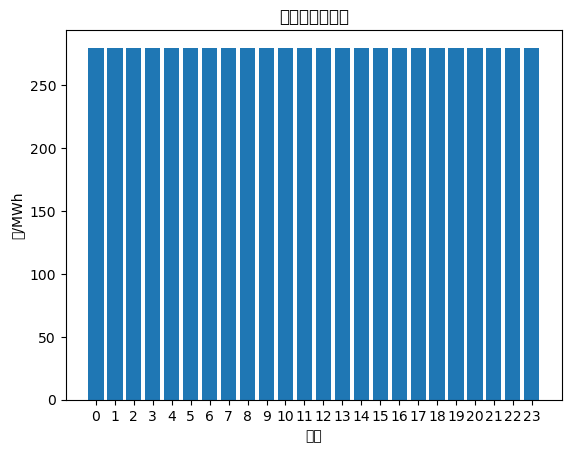

In [42]:
import matplotlib.pyplot as plt

x = [i for i in range(24)]

plt.bar(x, sr_price)
plt.xticks(x, x)
plt.title('即時備轉容量費')
plt.xlabel('小時')
plt.ylabel('元/MWh')
plt.show()

In [3]:
from datetime import *
from interval import Interval
import time
import configparser as cp
import pandas as pd
import numpy as np
import random
import csv
import os
import pymysql
from datetime import datetime,date,time,timedelta
import requests,json

ncku_host = '140.116.163.7' 
ncku_port = 10108 
account = 'Thomas'
password = 'epslab92702'

conn = pymysql.connect(host=ncku_host, port=ncku_port, user=account, passwd=password, db='ceci_planning', charset='utf8')
cursor = conn.cursor()
sql1 = ("SELECT * FROM `ess_parameter` ORDER BY `sn` DESC LIMIT 1") #Find the latest time in the database
cursor.execute(sql1) 
ess = cursor.fetchone() #fetchone;one only #fetchall; all data catched
cursor.close()
conn.close()

In [4]:
conn = pymysql.connect(host=ncku_host, port=ncku_port, user=account, passwd=password, db='ceci_planning', charset='utf8')
cursor = conn.cursor()
sql1 = ("SELECT * FROM `ess_parameter` ORDER BY `sn` DESC LIMIT 1") #Find the latest time in the database
cursor.execute(sql1) 
ess_parameter = cursor.fetchone() #fetchone;one only #fetchall; all data catched
cursor.close()
conn.close()

battery_ub = ess_parameter[1]
battery_lb = ess_parameter[2]
pcs_ub = ess_parameter[3]
pcs_lb = ess_parameter[4]
ESS_SOCmin = ess_parameter[5]/100
ESS_SOCmax = ess_parameter[6]/100
ESS_SOCinitial = ESS_SOCmin
ess_calender_life = ess_parameter[7]
mESS = round(1/ess_parameter[8],7)
Ess_efficiency = ess_parameter[9]/100
ess_cost = ess_parameter[10]                                                               #電池建置價格
pcs_cost = ess_parameter[11]                                                             #pcs建置價格
ess_parameter

(1,
 'b0ab6a74-322a-66d9-aadc-289ccfca68f8',
 12,
 8,
 12,
 8,
 90.0,
 10.0,
 10,
 6000,
 95.0,
 16000,
 3500,
 datetime.datetime(2023, 11, 7, 16, 28, 57),
 '0000-00-00 00:00:00')

In [74]:
conn = pymysql.connect(host=ncku_host, port=ncku_port, user=account, passwd=password, db='ceci_planning', charset='utf8')
cursor = conn.cursor()
sql1 = ("SELECT * FROM `opt_parameter` ORDER BY `sn` DESC LIMIT 1") #Find the latest time in the database
cursor.execute(sql1) 
ess_parameter = cursor.fetchone() #fetchone;one only #fetchall; all data catched
cursor.close()
conn.close()

planning_year = ess_parameter[1]
cc_ub = ess_parameter[2]
discount_rate = ess_parameter[3]
spr_status = 1 if(ess_parameter[4] == '是') else 0
print(ess_parameter[4])
print(spr_status)

是
1


In [105]:
conn = pymysql.connect(host=ncku_host, port=ncku_port, user=account, passwd=password, db='ceci_planning', charset='utf8')
cursor = conn.cursor()
sql1 = ("SELECT * FROM `tou_data`") #Find the latest time in the database
cursor.execute(sql1) 
tou_data = pd.DataFrame(cursor.fetchall()) #fetchone;one only #fetchall; all data catched
cursor.close()
conn.close()
nonsummer_tou = np.array(tou_data.iloc[0, 2:])
summer_tou = np.array(tou_data.iloc[1, 2:])

TOU_scenario = np.array([nonsummer_tou,summer_tou])
TOU_scenario

array([[1.66, 1.66, 1.66, 1.66, 1.66, 1.66, 3.82, 3.82, 3.82, 3.82, 3.82,
        1.66, 1.66, 1.66, 3.82, 3.82, 3.82, 3.82, 3.82, 3.82, 3.82, 3.82,
        3.82, 3.82],
       [1.83, 1.83, 1.83, 1.83, 1.83, 1.83, 1.83, 1.83, 1.83, 4.08, 4.08,
        4.08, 4.08, 4.08, 4.08, 4.08, 6.58, 6.58, 6.58, 6.58, 6.58, 6.58,
        4.08, 4.08]], dtype=object)

In [147]:
conn = pymysql.connect(host=ncku_host, port=ncku_port, user=account, passwd=password, db='ceci_planning', charset='utf8')
cursor = conn.cursor()
sql1 = ("SELECT * FROM `spr_parameter` ORDER BY `sn` DESC LIMIT 1") #Find the latest time in the database
cursor.execute(sql1) 
spr_parameter = cursor.fetchone() #fetchone;one only #fetchall; all data catched
cursor.close()
conn.close()
SpR_eff_price = np.array([spr_parameter[1]]*96)
SpR_energy_price = np.array([spr_parameter[2]/1000/4]*96)

In [185]:
conn = pymysql.connect(host=ncku_host, port=ncku_port, user=account, passwd=password, db='ceci_planning', charset='utf8')
cursor = conn.cursor()

sql1 = ("SELECT * FROM `spr_cap_price` ORDER BY `sn` DESC LIMIT 1") #Find the latest time in the database
cursor.execute(sql1) 
spr_cap_price = cursor.fetchone()[1:25] #fetchone;one only #fetchall; all data catched
sql2 = ("SELECT * FROM `spr_parameter` ORDER BY `sn` DESC LIMIT 1") #Find the latest time in the database
cursor.execute(sql2) 
spr_parameter = cursor.fetchone() #fetchone;one only #fetchall; all data catched

cursor.close()
conn.close()
print(len(spr_cap_price))
SpR_eff_price = np.array([spr_parameter[1]]*96)
SpR_energy_price = np.array([spr_parameter[2]/1000/4]*96)

24


In [201]:
start_time = spr_parameter[4]
start_time = round(int(str(spr_parameter[4])[0:2])*4+int(str(spr_parameter[4])[3:5])/15)
start_time

70

In [2]:
import pymysql

conn = pymysql.connect(host=ncku_host, port=ncku_port, user=account, passwd=password, db='ceci_planning', charset='utf8')
cursor = conn.cursor()
sql1 = ("SELECT * FROM `planning_area_data` ORDER BY `sn` DESC LIMIT 1") #Find the latest time in the database
cursor.execute(sql1) 
planning_area_data = cursor.fetchone() #fetchone;one only #fetchall; all data catched
cursor.close()
conn.close()

planning_area_data

NameError: name 'ncku_host' is not defined

In [204]:
conn = pymysql.connect(host=ncku_host, port=ncku_port, user=account, passwd=password, db='ceci_planning', charset='utf8')
cursor = conn.cursor()

sql1 = (f"UPDATE `optimal_capacity` SET `pcs_capacity` = '{9.5}', `battery_capacity` = '{9.5}', `contract_capacity` = '{10}', `ess_build_cost` = '{1000000000}' WHERE `optimal_capacity`.`sn` = 1")
print(sql1)
cursor.execute(sql1) 
conn.commit()
cursor.close()
conn.close()

UPDATE `optimal_capacity` SET `pcs_capacity` = '9.5', `battery_capacity` = '9.5', `contract_capacity` = '10', `ess_build_cost` = '1000000000' WHERE `optimal_capacity`.`sn` = 1


In [1]:
cal_a = 3.36 * (10**(-6))
cal_b = 2.12 * (10**(-5))
cal_c = 1.12 * (10**(-5))
cyc_a = 2.07 * (10**(-4))
cyc_b = 8.12 * (10**(-6))

In [34]:
cal_a = 3.36 * (10**(-6))
cal_b = 2.12 * (10**(-5))
cal_c = 1.12 * (10**(-5))
def cal_function(SoC):
    return cal_a * SoC**2 + cal_b * SoC + cal_c

import numpy as np 
def piecewise(lb,ub):
    A = np.array([[lb,1],
                [ub,1]])
    B = np.array([cal_function(lb),cal_function(ub)])
    return np.linalg.solve(A, B)

sol = []
for i in range(0, 10, 2):
    sol.append(piecewise(i/10, (i+2)/10))
for i in range(0, 5):
    print((i*2+1)/10,(i*2+1)/10)
    print(cal_function((i*2+1)/10), sol[i][0]*(i*2+1)/10+sol[i][1])
    print((i*2+2)/10,(i*2+2)/10)
    print(cal_function((i*2+2)/10), sol[i][0]*(i*2+2)/10+sol[i][1])
sol

0.1 0.1
1.3353600000000002e-05 1.3387200000000001e-05
0.2 0.2
1.55744e-05 1.55744e-05
0.3 0.3
1.78624e-05 1.7896e-05
0.4 0.4
2.02176e-05 2.02176e-05
0.5 0.5
2.2640000000000003e-05 2.2673600000000003e-05
0.6 0.6
2.5129600000000004e-05 2.5129600000000004e-05
0.7 0.7
2.7686400000000003e-05 2.7720000000000006e-05
0.8 0.8
3.0310400000000004e-05 3.0310400000000007e-05
0.9 0.9
3.3001600000000006e-05 3.30352e-05
1.0 1.0
3.576e-05 3.5759999999999996e-05


[array([2.1872e-05, 1.1200e-05]),
 array([2.32160e-05, 1.09312e-05]),
 array([2.45600e-05, 1.03936e-05]),
 array([2.5904e-05, 9.5872e-06]),
 array([2.7248e-05, 8.5120e-06])]

In [2]:
cyc_a = 2.07 * (10**(-4))
cyc_b = 8.12 * (10**(-6))
def cyc_function(DoD):
    return cyc_a * DoD**2 + cyc_b * DoD

import numpy as np 
def piecewise_cyc(lb,ub):
    A = np.array([[lb,1],
                [ub,1]])
    B = np.array([cyc_function(lb),cyc_function(ub)])
    return np.linalg.solve(A, B)

sol = []
for i in range(0, 10, 2):
    sol.append(piecewise_cyc(i/10, (i+2)/10))
for i in range(0, 5):
    print((i*2+1)/10,(i*2+1)/10)
    print(cyc_function((i*2+1)/10), sol[i][0]*(i*2+1)/10+sol[i][1])
    print((i*2+2)/10,(i*2+2)/10)
    print(cyc_function((i*2+2)/10), sol[i][0]*(i*2+2)/10+sol[i][1])
sol

0.1 0.1
2.8820000000000005e-06 4.952000000000001e-06
0.2 0.2
9.904000000000002e-06 9.904000000000002e-06
0.3 0.3
2.1065999999999998e-05 2.313600000000001e-05
0.4 0.4
3.636800000000001e-05 3.636800000000001e-05
0.5 0.5
5.5809999999999996e-05 5.788e-05
0.6 0.6
7.9392e-05 7.939200000000002e-05
0.7 0.7
0.00010711399999999998 0.00010918399999999996
0.8 0.8
0.00013897600000000002 0.000138976
0.9 0.9
0.000174978 0.000177048
1.0 1.0
0.00021512 0.00021512


[array([4.952e-05, 0.000e+00]),
 array([ 1.3232e-04, -1.6560e-05]),
 array([ 2.1512e-04, -4.9680e-05]),
 array([ 2.9792e-04, -9.9360e-05]),
 array([ 0.00038072, -0.0001656 ])]

In [41]:
import math
DoD_par = [140000, -0.501, -123000]
SoC_par = [1.04, 0.5]
Tem_par = [0.0693, 25]
Time_par = [4.14*(10**-10)]
def cycle_degradation(DoD, SoC, Tem):
    S_DoD = 1/(DoD_par[0]*(DoD**DoD_par[1])+DoD_par[2])
    S_SoC = math.exp(SoC_par[0]*(SoC-SoC_par[1]))
    S_Tem = math.exp(Tem_par[0]*(Tem-Tem_par[1])*Tem_par[1]/Tem)

    cyc_aging = S_DoD*S_SoC*S_Tem
    
    return cyc_aging

def calendar_degradation(SoC, Tem, t):
    SoC_par = [1.04, 0.5]
    Tem_par = [0.0693, 25]
    Time_par = [4.14*(10**-10)]

    S_SoC = math.exp(SoC_par[0]*(SoC-SoC_par[1]))
    S_Tem = math.exp(Tem_par[0]*(Tem-Tem_par[1])*Tem_par[1]/Tem)
    S_Time = Time_par[0]*t

    cal_aging = S_Time*S_SoC*S_Tem
    
    return cal_aging

In [42]:
calendar_degradation(0.6,28,60*60*24*365)

0.0174417271124298

In [43]:
cycle_degradation(0.8,0.6,28)

3.980747227196599e-05